In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
!{sys.executable} -m pip install catboost
!{sys.executable} -m pip install xgboost
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import sys
!{sys.executable} -m pip install kagglehub

In [93]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /Users/rajatkhedar/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [94]:
import os

folder_path = "/Users/rajatkhedar/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1"
print(os.listdir(folder_path))

['StudentsPerformance.csv']


In [95]:
df = pd.read_csv("/Users/rajatkhedar/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
df.shape

(1000, 8)

In [97]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [98]:
df.duplicated().sum()


0

In [99]:
x=df.drop(columns=['math score'],axis=1)

In [100]:
y=df['math score']

In [101]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer ## it is used for applying two or more things at same time
numeric_transformer=StandardScaler()
on_transformer=OneHotEncoder(drop='first')
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",on_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ],remainder='passthrough'
)


In [102]:
x=preprocessor.fit_transform(x)

In [126]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,xtest.shape

((800, 14), (200, 14))

In [128]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [132]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor(),
}

In [148]:
model_list = []
r2_list = []

for i in range(len(models)):  # Loop through models dictionary
    model = list(models.values())[i]  # Get model instance
    model.fit(xtrain, ytrain)  # Train model
    
    # Predict on training and test data
    ytrainpred = model.predict(xtrain)
    ytestpred = model.predict(xtest)

    # Evaluate model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(ytrain, ytrainpred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(ytest, ytestpred)

    # Print results
    print(list(models.keys())[i])  # Model name
    model_list.append(model.__class__.__name__)  # Store model name instead of incorrect .values()
    
    print("Train MAE:", train_mae)
    print("Train MSE:", train_mse)
    print("Train RMSE:", train_rmse)
    print("Train R2:", train_r2)
    print(" ")
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    
    r2_list.append(test_r2)  # Append the correct test R2 score


Linear Regression
Train MAE: 4.266711846071957
Train MSE: 28.33487038064859
Train RMSE: 5.323050852720514
Train R2: 0.8743172040139593
 
Test MAE: 4.21476314247485
Test MSE: 29.095169866715484
Test RMSE: 5.393993869732842
Test R2: 0.8804332983749565
Lasso
Train MAE: 5.206302661246526
Train MSE: 43.47840400585579
Train RMSE: 6.593815587795566
Train R2: 0.8071462015863456
 
Test MAE: 5.157881810347763
Test MSE: 42.506416838411624
Test RMSE: 6.519694535667421
Test R2: 0.8253197323627852
Ridge
Train MAE: 4.264991671776522
Train MSE: 28.33968664708975
Train RMSE: 5.323503230682757
Train R2: 0.8742958408729106
 
Test MAE: 4.212514888062383
Test MSE: 29.090766576214747
Test RMSE: 5.3935856882239985
Test R2: 0.8804513937125634
KNeighborsRegressor
Train MAE: 4.464
Train MSE: 31.114400000000003
Train RMSE: 5.5780283254928
Train R2: 0.8619882591699171
 
Test MAE: 5.746999999999999
Test MSE: 54.871
Test RMSE: 7.407496203171488
Test R2: 0.774507434913684
DecisionTreeRegressor
Train MAE: 0.01875
Tra

In [150]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model name,R2_score
2,Ridge,0.880451
0,LinearRegression,0.880433
5,RandomForestRegressor,0.851199
7,CatBoostRegressor,0.849801
8,AdaBoostRegressor,0.847710
1,Lasso,0.825320
6,XGBRegressor,0.825046
3,KNeighborsRegressor,0.774507
4,DecisionTreeRegressor,0.730108


In [152]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(xtrain,ytrain)
ypred=lin_model.predict(xtest)
score=r2_score(ytest,ypred)*100
print("accuracy of the model is %.2f " %score)

accuracy of the model is 88.04 


Text(0, 0.5, 'predicted')

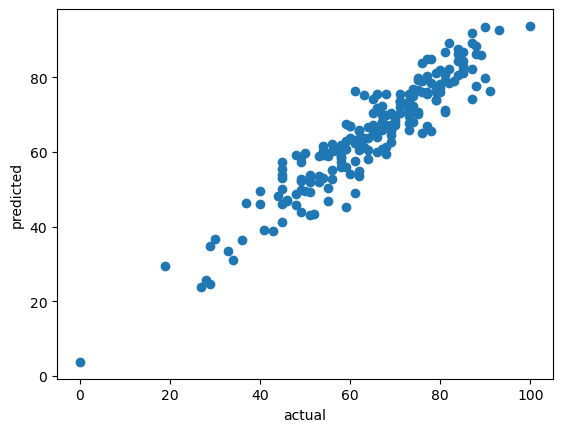

In [154]:
plt.scatter(ytest,ypred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

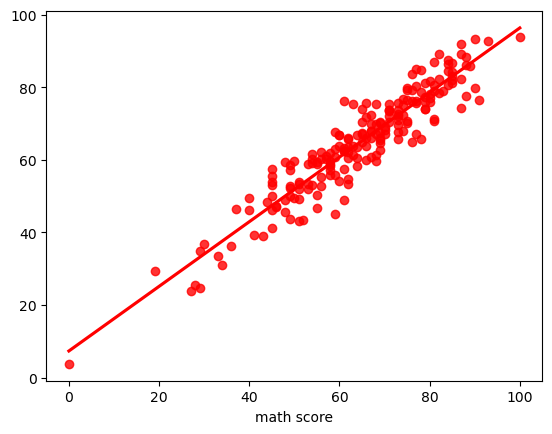

In [156]:
sns.regplot(x=ytest,y=ypred,ci=None,color='red')